<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [6]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
# Load the dataset
boston_df=pd.read_csv(boston_url)

In [14]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 1

In [10]:
# View the first few rows of the dataset
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Task 2

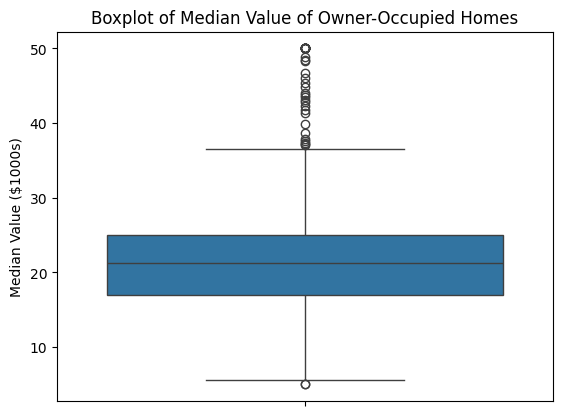

In [15]:
# 1. Boxplot for "Median value of owner-occupied homes" (MEDV)
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000s)')
plt.show()

###### This boxplot will show the distribution of home values. Check for outliers, median value, and spread of the data.

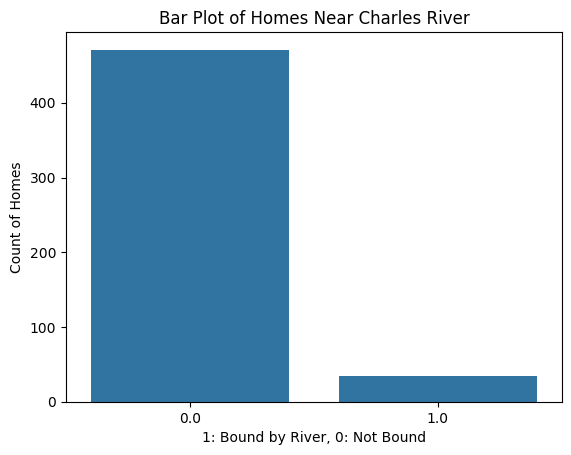

In [17]:
# 2. Bar plot for the Charles River variable (CHAS)
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Homes Near Charles River')
plt.xlabel('1: Bound by River, 0: Not Bound')
plt.ylabel('Count of Homes')
plt.show()

###### The bar plot shows how many homes are near the Charles River versus those that are not.

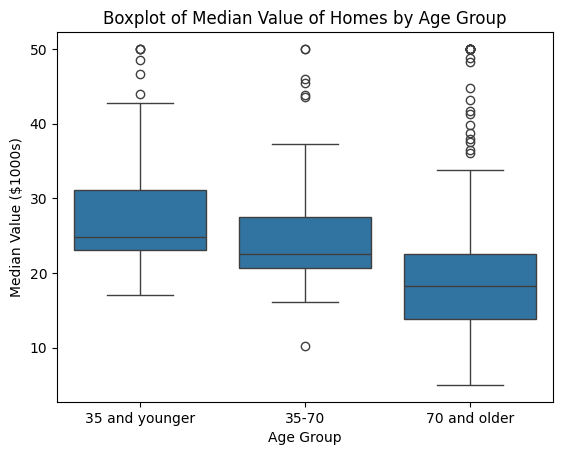

In [20]:
# 3. Boxplot for MEDV vs AGE (grouped by age ranges)
# Discretizing the age variable into three groups
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', '35-70', '70 and older'])

sns.boxplot(x=boston_df['AGE_GROUP'], y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

###### This plot shows how the age of the houses affects their median values. It’s useful to observe if older homes have higher or lower values compared to newer ones.

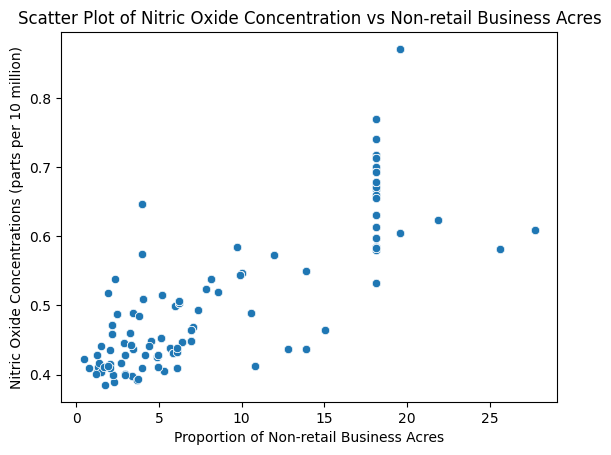

In [22]:
# 4. Scatter plot for Nitric oxide concentrations (NOX) and non-retail business acres (INDUS)
sns.scatterplot(x=boston_df['INDUS'], y=boston_df['NOX'])
plt.title('Scatter Plot of Nitric Oxide Concentration vs Non-retail Business Acres')
plt.xlabel('Proportion of Non-retail Business Acres')
plt.ylabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.show()

###### The scatter plot will help determine if there is a relationship between the proportion of non-retail business acres and nitric oxide concentration.

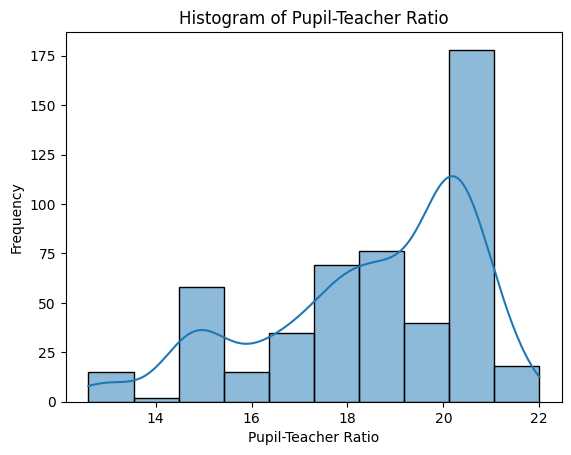

In [24]:
# 5. Histogram for the pupil-teacher ratio variable (PTRATIO)
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

###### The histogram will give insight into the distribution of pupil-teacher ratios across towns.

#### Task 3

##### 1. Is there a significant difference in the median value of houses bounded by the Charles river or not?

In [27]:
# Hypothesis:
# --- Null Hypothesis:𝐻0: There is no difference in the median value of houses bounded by the Charles River.
# --- Alternative Hypothesis:𝐻1: There is a significant difference in the median value of houses bounded by the Charles River.
# T-test for independent samples

river_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
river_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(river_yes, river_no)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05


###### Conclusion: If the p-value is less than 0.05, reject the null hypothesis, meaning there is a significant difference in median house values.

##### 2. Is there a difference in the median values of houses for different proportions of owner-occupied units built before 1940 (AGE)?

In [30]:
# Hypothesis:
# --- Null Hypothesis: 𝐻0: There is no difference in median house values across different AGE groups.
# --- Alternative Hypothesis:𝐻1: There is a difference.
# ANOVA Test
anova_result = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)

print(anova_table)

                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


###### Conclusion: Check the p-value from the ANOVA table. If it is less than 0.05, there is a significant difference in the median house values across different age groups.

##### 3. Can we conclude that there is no relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS)?

In [33]:
# Hypothesis:
# --- Null Hypothesis:𝐻0: There is no relationship between NOX and INDUS.
# --- Alternative Hypothesis: 𝐻1: There is a relationship.
# Pearson Correlation Test
correlation, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation: {correlation}, P-value: {p_value}")

Pearson Correlation: 0.7636514469209192, P-value: 7.913361061210442e-98


In [34]:
###### Conclusion: If the p-value is less than 0.05, there is a statistically significant relationship between NOX and INDUS.

In [35]:
# 4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

In [36]:
# Regression Analysis
X = boston_df[['DIS']]
y = boston_df['MEDV']

# Add constant
X = sm.add_constant(X)

# Perform regression
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        12:03:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0